# Decision Trees

## The Data

We will be using the same dataset through our discussions on classification with tree-methods (Decision Tree,Random Forests, and Gradient Boosted Trees) in order to compare performance metrics across these related models.

We will work with the "Palmer Penguins" dataset, to review how changing hyperparameters can change classification results.


<img src="penguin.jpg" style="max-width:400px">

doi:10.1371/journal.pone.0090081

Summary:
The data folder contains two CSV files. For intro courses/examples, the first one (penguins_size.csv).

* penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

    * species: penguin species (Chinstrap, Adélie, or Gentoo)
    * culmen_length_mm: culmen length (mm)
    * culmen_depth_mm: culmen depth (mm)
    * flipper_length_mm: flipper length (mm)
    * body_mass_g: body mass (g)
    * island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * sex: penguin sex

* (Not used) penguins_lter.csv: Original combined data for 3 penguin species  

Note: The culmen is "the upper ridge of a bird's beak" 

**Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist**

## Imports

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv("C:/Users/zenab/Downloads/Projects/Decision tree/penguins_size.csv")

In [13]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### Missing Data

Recall the purpose is to create a model for future use, so data points missing crucial information won't help in this task, especially since for future data points we will assume the research will grab the relevant feature information.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [15]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [16]:
# What percentage are we dropping?
100*(10/344)

2.9069767441860463

In [17]:
df = df.dropna()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [19]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [20]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [21]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [22]:
df = df[df['sex']!='.']

## Visualization

<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

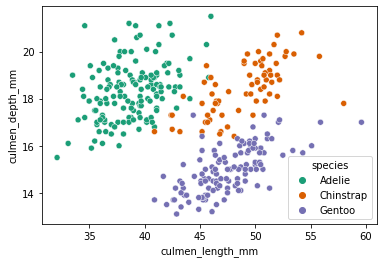

In [23]:
sns.scatterplot(x='culmen_length_mm',y='culmen_depth_mm',data=df,hue='species',palette='Dark2')

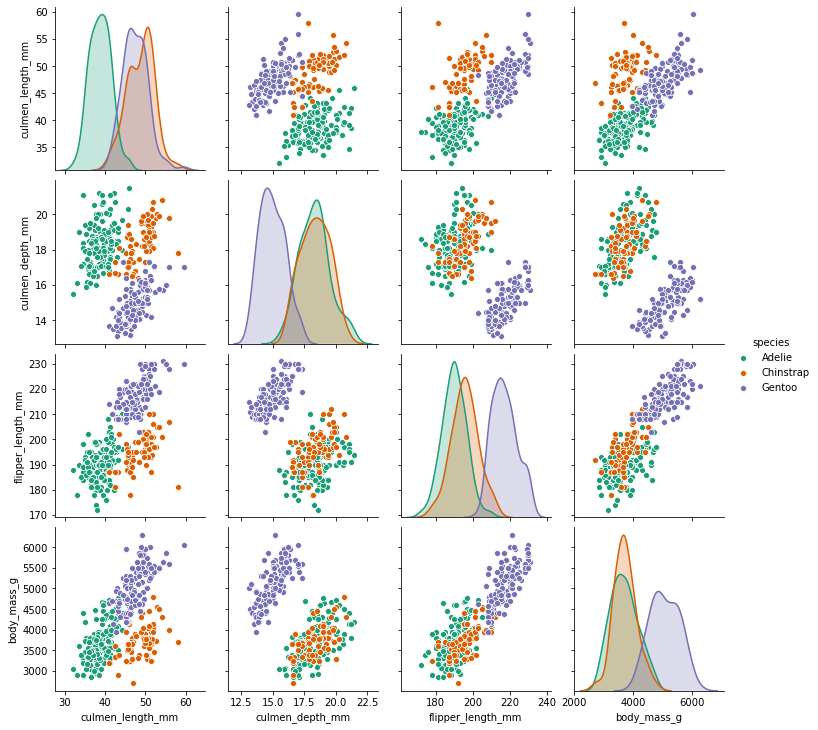

In [126]:
sns.pairplot(df,hue='species',palette='Dark2')

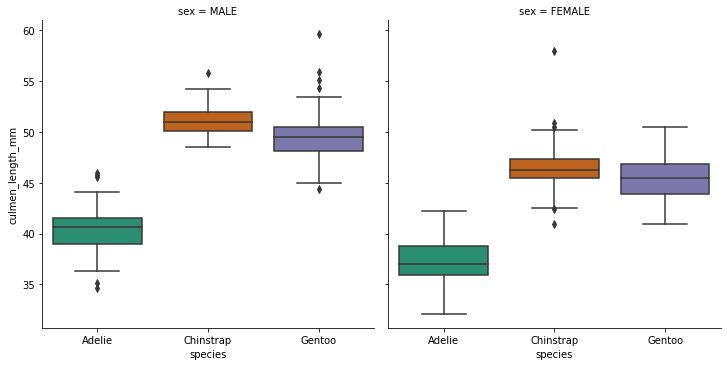

In [24]:
sns.catplot(x='species',y='culmen_length_mm',data=df,kind='box',col='sex',palette='Dark2')

## Feature Engineering

In [25]:
pd.get_dummies(df)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,1,1,0,0,1,0
340,46.8,14.3,215.0,4850.0,0,0,1,1,0,0,1,0
341,50.4,15.7,222.0,5750.0,0,0,1,1,0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,1,1,0,0,1,0


In [28]:
pd.get_dummies(df.drop('species',axis=1),drop_first=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


## Train | Test Split

In [29]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Decision Tree Classifier

## Default Hyperparameters

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
model = DecisionTreeClassifier()

In [34]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [35]:
base_pred = model.predict(X_test)

## Evaluation

In [36]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [37]:
confusion_matrix(y_test,base_pred)

array([[39,  1,  0],
       [ 3, 24,  0],
       [ 1,  0, 32]], dtype=int64)

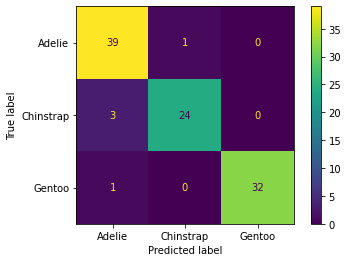

In [38]:
plot_confusion_matrix(model,X_test,y_test)

In [39]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

      Adelie       0.91      0.97      0.94        40
   Chinstrap       0.96      0.89      0.92        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.95       100
   macro avg       0.96      0.94      0.95       100
weighted avg       0.95      0.95      0.95       100



In [40]:
model.feature_importances_

array([0.34035881, 0.02010577, 0.57575804, 0.        , 0.03806069,
       0.        , 0.02571668])

In [41]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
culmen_length_mm,0.340359
culmen_depth_mm,0.020106
flipper_length_mm,0.575758
body_mass_g,0.000000
island_Dream,0.038061
island_Torgersen,0.000000
sex_MALE,0.025717


<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

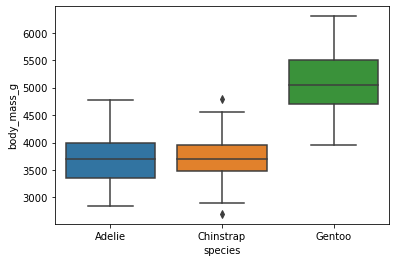

In [42]:
sns.boxplot(x='species',y='body_mass_g',data=df)

## Visualize the Tree


In [43]:
from sklearn.tree import plot_tree

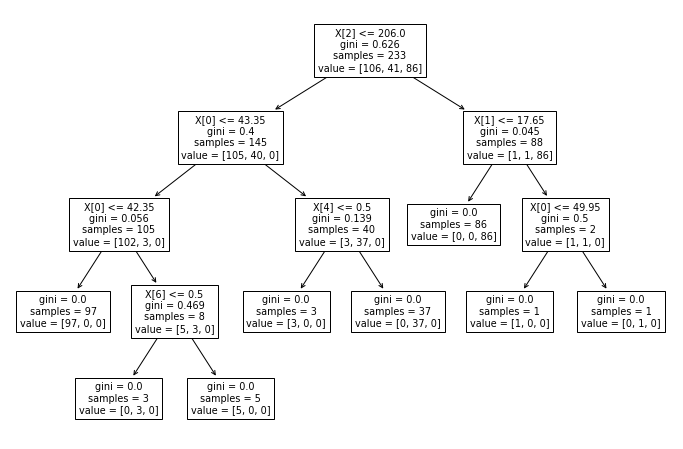

In [44]:
plt.figure(figsize=(12,8))
plot_tree(model);

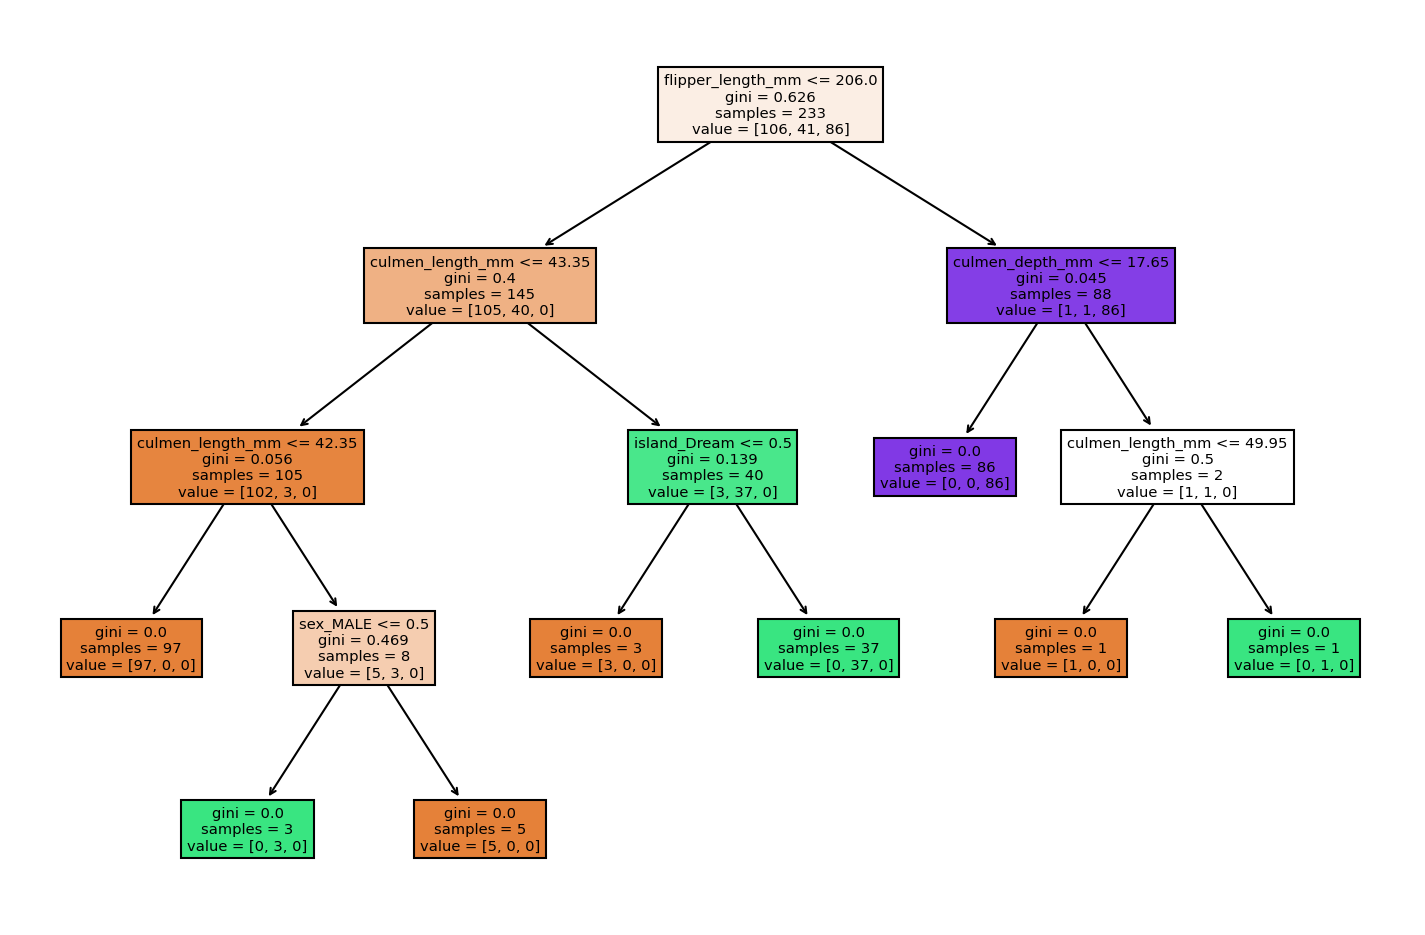

In [45]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=X.columns);

## Reporting Model Results

create a function that reports back classification results and plots out the tree.

In [48]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

##  Hyperparameters

### Max Depth

In [49]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best ran

In [51]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.87      0.97      0.92        40
   Chinstrap       0.91      0.78      0.84        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.92       100
   macro avg       0.93      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100





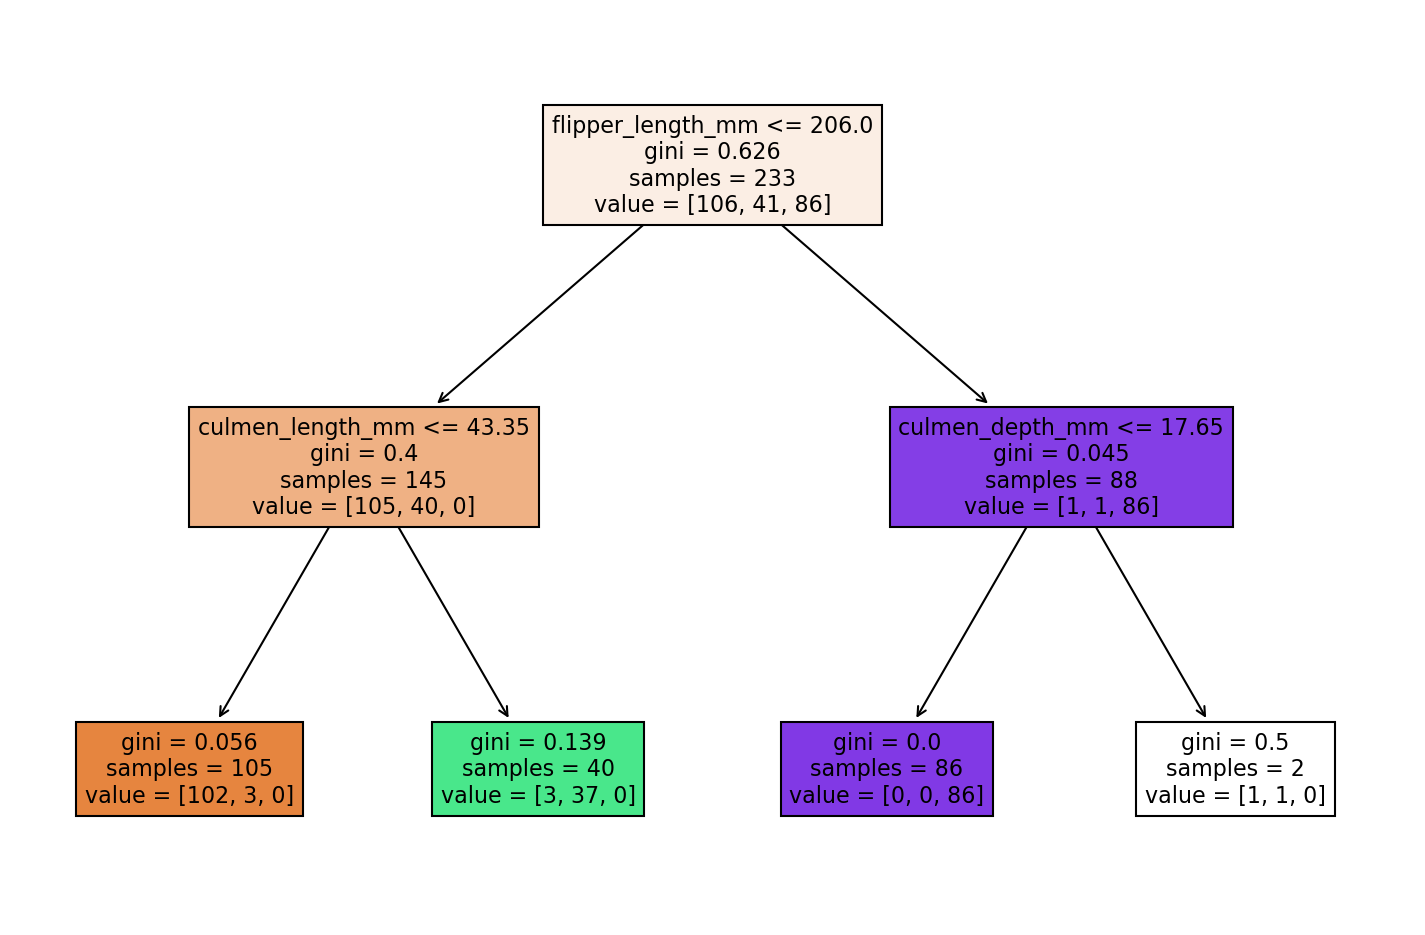

In [52]:
report_model(pruned_tree)

## Max Leaf Nodes

In [55]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        40
   Chinstrap       0.91      0.78      0.84        27
      Gentoo       0.86      0.97      0.91        33

    accuracy                           0.91       100
   macro avg       0.91      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100





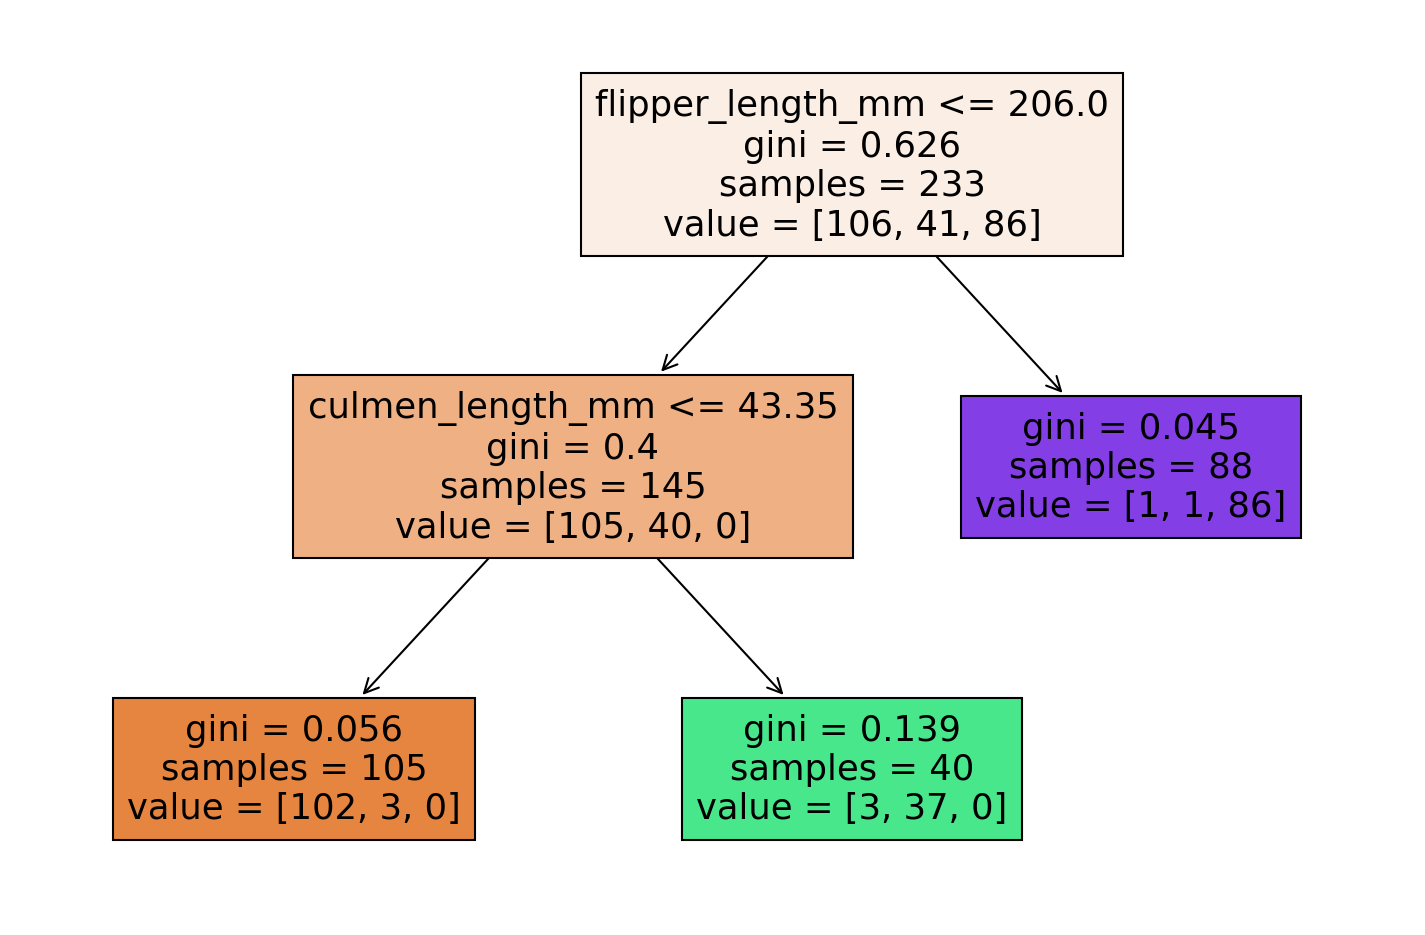

In [56]:
report_model(pruned_tree)

## Criterion

In [57]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       0.86      0.95      0.90        40
   Chinstrap       0.92      0.81      0.86        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.92       100
   macro avg       0.93      0.91      0.92       100
weighted avg       0.92      0.92      0.92       100





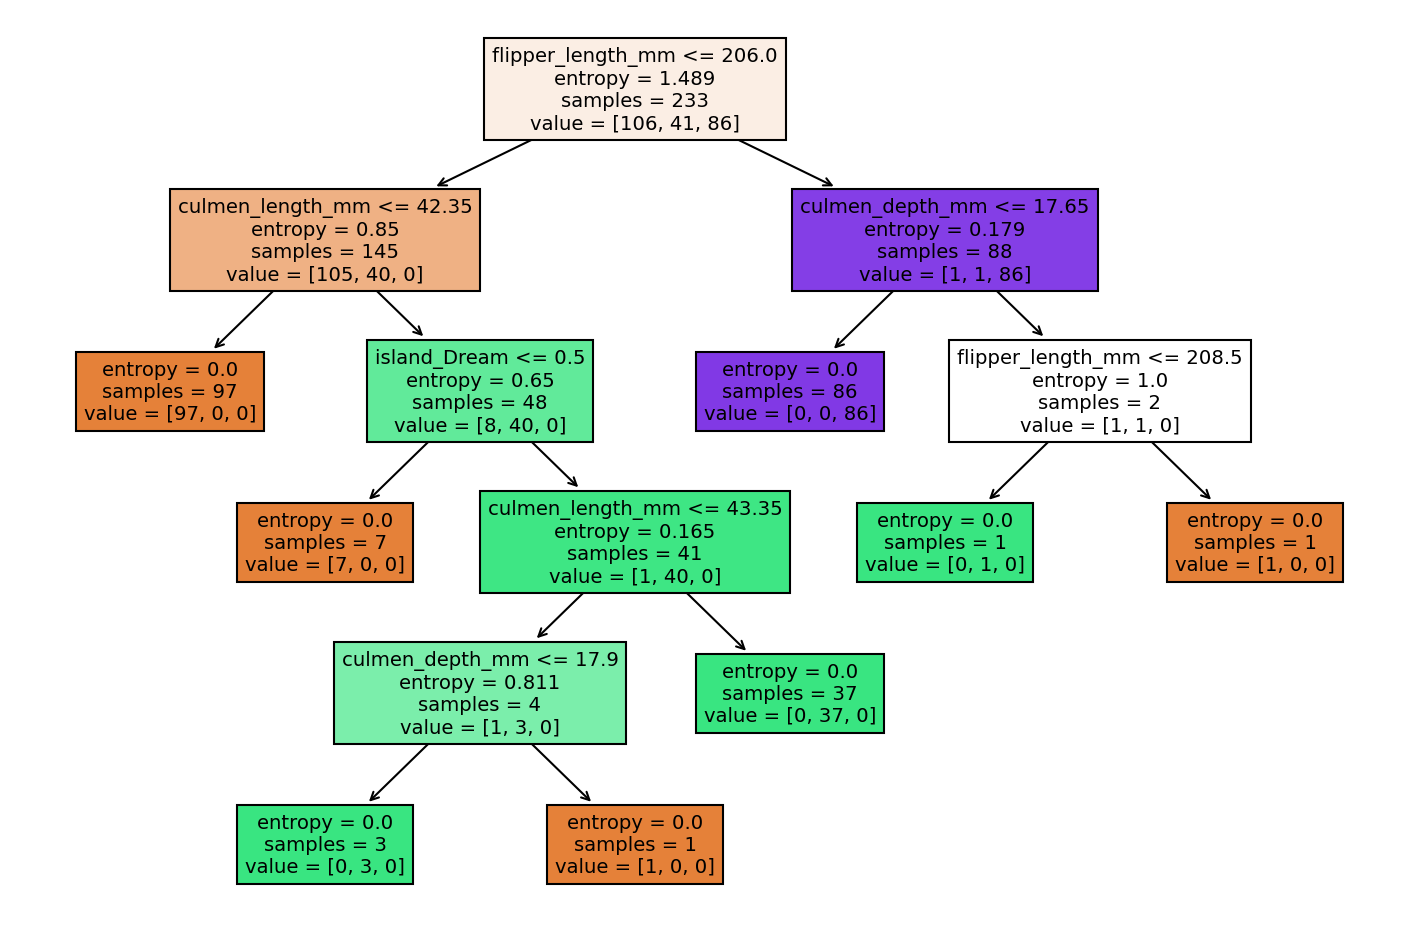

In [58]:
report_model(entropy_tree)

---